<a href="https://colab.research.google.com/github/moonbeam87/tensorflow-learning/blob/master/TimePrediction(Doesn't_Work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas_datareader
!pip install matplotlib
!pip install pandas 
!pip install datetime 
!pip install urllib.request
!pip install json
!pip install os
!pip install numpy
!pip install sklearn
!pip install Quandl

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 235kB 7.4MB/s 
ERROR: Could not find a version that satisfies the requirement urllib.request (from versions: none)
ERROR: No matching distribution found for urllib.request
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [0]:
quandl.ApiConfig.api_key = 'NxTUTAQswbKs5ybBbwfK'
df = quandl.get('WIKI/AAPL')

NameError: ignored

In [0]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from numpy import sqrt,mean,log,diff
import quandl

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
quandl.ApiConfig.api_key = 'NxTUTAQswbKs5ybBbwfK'
df = quandl.get('WIKI/AAPL')

In [0]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [0]:
df = df.sort_values('Date')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


KeyError: ignored

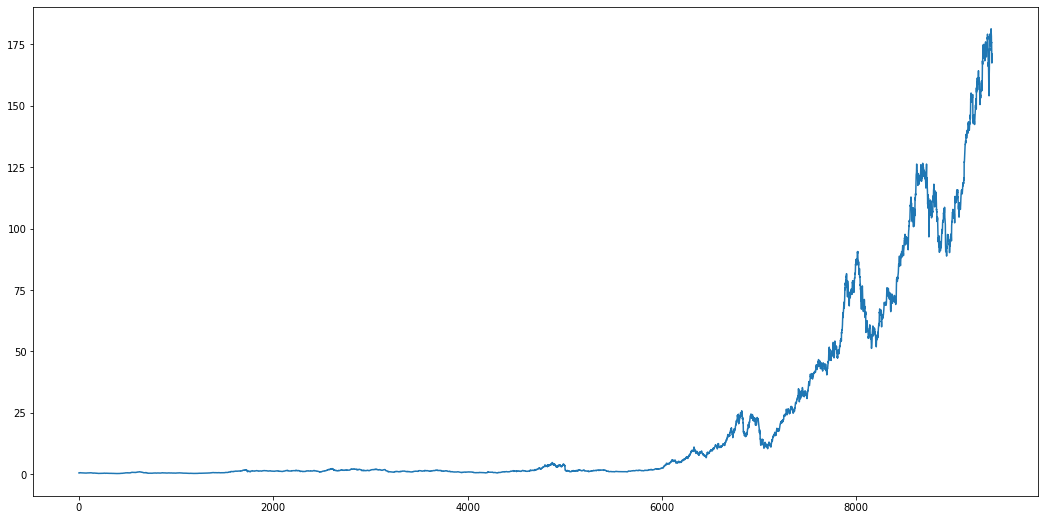

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Adj. Low']+df['Adj. High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()


Let's Try that again

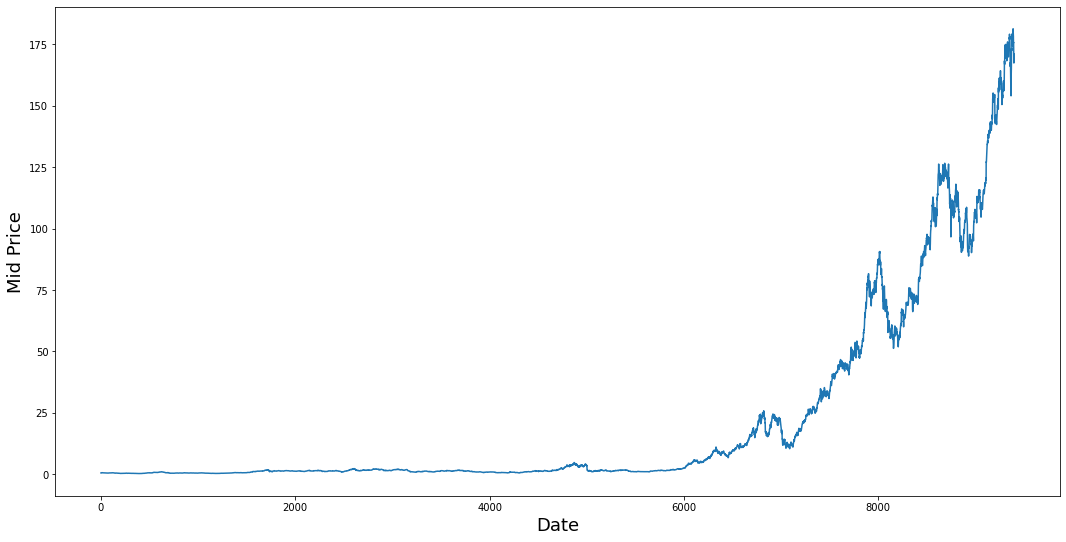

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Adj. Low']+df['Adj. High'])/2.0)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
high_prices = df.loc[:,'Adj. High'].as_matrix()
low_prices = df.loc[:,'Adj. Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

AttributeError: ignored

Guess that's not going to work Either. Let's Try is again another way.

In [0]:
high_prices = df('Adj. High')

TypeError: ignored

In [0]:
high_prices = df['Adj. High']

In [0]:
low_prices = df['Adj. Low']

In [0]:
mid_prices = (high_prices+low_prices)/2.0
print(mid_prices)

Date
1980-12-12      0.423588
1980-12-15      0.401607
1980-12-16      0.372128
1980-12-17      0.381317
1980-12-18      0.392418
                 ...    
2018-03-21    173.175000
2018-03-22    170.640000
2018-03-23    167.430000
2018-03-26    169.770000
2018-03-27    171.035000
Length: 9400, dtype: float64


In [0]:
df.count()

Open           9400
High           9400
Low            9400
Close          9400
Volume         9400
Ex-Dividend    9400
Split Ratio    9400
Adj. Open      9400
Adj. High      9400
Adj. Low       9400
Adj. Close     9400
Adj. Volume    9400
dtype: int64

In [0]:
train_data = mid_prices[:4700]
test_data = mid_prices[4700:]

In [0]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

AttributeError: ignored

In [0]:
scaler = MinMaxScaler()
train_data = train_data.values.reshape(-1,1)
test_data = test_data.values.reshape(-1,1)

In [0]:
smoothing_window_size = 2500
for di in range(0, 10000, smoothing_window_size):
  scaler.fit(train_data[di:di+smoothing_window_size,:])
  train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

NameError: ignored

In [0]:
smoothing_window_size = 2500
for di in range(0, 10000, smoothing_window_size):
  scaler.fit(train_data[di:di+smoothing_window_size,:])
  train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: ignored

In [0]:
smoothing_window_size = 2500
for di in range(0, 9400-2500, smoothing_window_size):
  scaler.fit(train_data[di:di+smoothing_window_size,:])
  train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: ignored

In [0]:
smoothing_window_size = 2500
for di in range(0, 5000, smoothing_window_size):
  scaler.fit(train_data[di:di+smoothing_window_size,:])
  train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: ignored